# MAT 381E Homework 3

## Question 1

1. Using the library [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) write a function that takes a URL from a specific Turkish Newspaper (any newspaper you'd like) and extracts and then returns the text (not the HTML source) of the news article given in the URL. (Warning: you cannot write a universal function that works for every newspaper. The function has to be specific to a specific newspaper.)

2. Write a separate function that cleans the text and removes all Turkish stopwords for a text coming from Step 1.

3. Display word clouds of 5 news articles after you apply the functions in Step 1 and Step 2.

In [2]:
import numpy as np
import pandas as pd
import regex as re
import requests
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from xmltodict import parse
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer
from wordcloud import WordCloud
from  nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import kaggle
import geopandas as gpd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkusert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/utkusert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Question 1.1

In [2]:
def sabahGazetesi(url) : 
    with requests.get(url) as link:
        raw = BeautifulSoup(link.content,'html.parser')
        text = raw.find('div', attrs={'class':"row topDetail"}).text
    return text


In [3]:
text1 = sabahGazetesi('https://www.sabah.com.tr/spor/futbol/2022/12/07/antalyaspor-hazirlik-macinda-napoliye-3-2-kaybetti')
text1

"\n\n\n\nHaberler\nSpor Haberleri\nFutbol Haberleri\nAntalyaspor, hazırlık maçında Napoli'ye 3-2 kaybetti!\n\n\n\n\n\nGiriş Tarihi: 7.12.2022  23:26\n\n\n \nAntalyaspor, hazırlık maçında Napoli'ye 3-2 kaybetti!\n\n\n\nDHA \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nABONE OL\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSpor Toto Süper Lig ekiplerinden Fraport TAV Antalyaspor, 2022 Dünya Kupası nedeniyle verilen arada Antalya'ya gelen İtalya Serie A ekiplerinden Napoli ile oynadığı hazırlık maçını 3-2 kaybetti.\n\n\n\n\nKatar'da düzenlenen 2022 Dünya Kupası nedeniyle lige verilen arada, Regnum Carya tarafından organize edilen Winter Football Series Turnuvası'nda Antalyaspor ile İtalya Serie A takımlarından Napoli hazırlık maçında Corendon Airlines Park Antalya Stadyumu'nda karşılaştı. Müsabakaya hızlı başlayan İtalya temsilcisi Napoli, 8'inci dakikada Giacomo Raspadori'nin attığı golle 1-0 öne geçti. İtalya ekibi, 14'üncü dakikada Matteo Politano'nun golüyle farkı ikiye çıkarırken, ilk

Question 1.2

In [4]:
def cleanText(text) :
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    data=[re.sub(r'[^\w\s]','', i) for i in tokens_without_sw]
    return data

In [5]:
text2 = cleanText(text1)
text2

['Haberler',
 'Spor',
 'Haberleri',
 'Futbol',
 'Haberleri',
 'Antalyaspor',
 '',
 'hazırlık',
 'maçında',
 'Napoliye',
 '32',
 'kaybetti',
 '',
 'Giriş',
 'Tarihi',
 '',
 '7122022',
 '2326',
 'Antalyaspor',
 '',
 'hazırlık',
 'maçında',
 'Napoliye',
 '32',
 'kaybetti',
 '',
 'DHA',
 'ABONE',
 'OL',
 'Spor',
 'Toto',
 'Süper',
 'Lig',
 'ekiplerinden',
 'Fraport',
 'TAV',
 'Antalyaspor',
 '',
 '2022',
 'Dünya',
 'Kupası',
 'nedeniyle',
 'verilen',
 'arada',
 'Antalyaya',
 'gelen',
 'İtalya',
 'Serie',
 'A',
 'ekiplerinden',
 'Napoli',
 'oynadığı',
 'hazırlık',
 'maçını',
 '32',
 'kaybetti',
 '',
 'Katarda',
 'düzenlenen',
 '2022',
 'Dünya',
 'Kupası',
 'nedeniyle',
 'lige',
 'verilen',
 'arada',
 '',
 'Regnum',
 'Carya',
 'tarafından',
 'organize',
 'edilen',
 'Winter',
 'Football',
 'Series',
 'Turnuvasında',
 'Antalyaspor',
 'İtalya',
 'Serie',
 'A',
 'takımlarından',
 'Napoli',
 'hazırlık',
 'maçında',
 'Corendon',
 'Airlines',
 'Park',
 'Antalya',
 'Stadyumunda',
 'karşılaştı',
 '',

In [6]:
def showCloud(text) :
    plt.figure(figsize=(12,12))
    cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
    cloud = plt.imshow(cloud.generate(' '.join(text)))
    return cloud

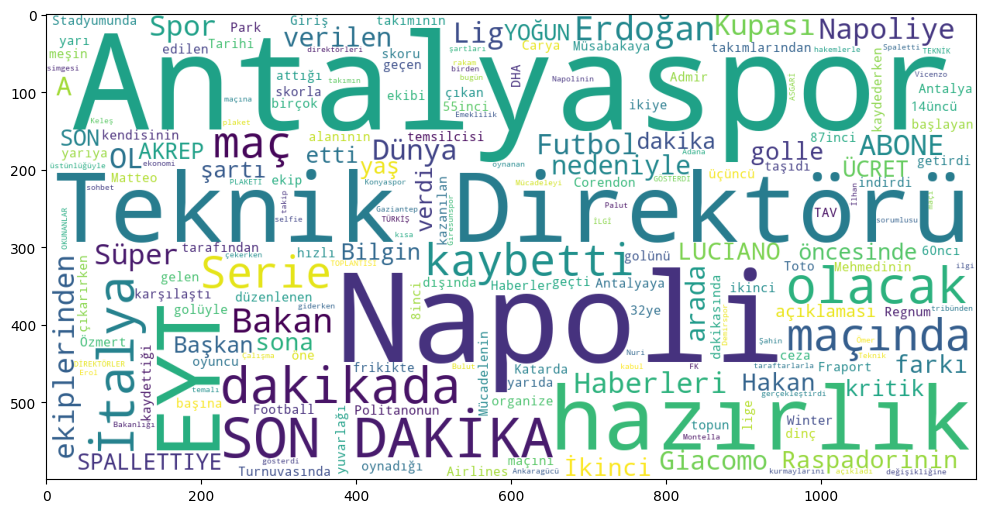

In [8]:
showCloud(text2)

Question 1.3

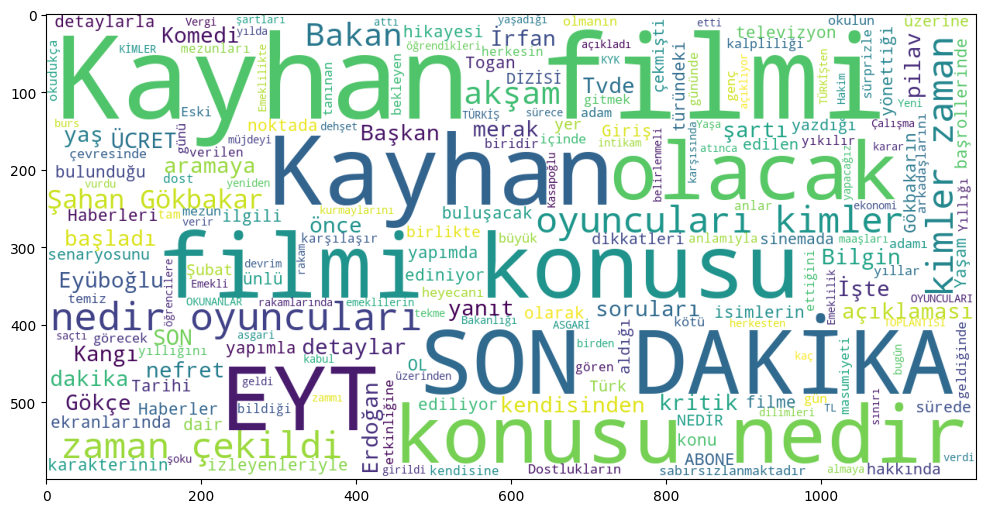

In [113]:
showCloud(cleanText(sabahGazetesi('https://www.sabah.com.tr/yasam/kayhan-filmi-konusu-nedir-oyunculari-kimler-ne-zaman-cekildi-kayhan-filmi-bu-aksam-tvde-6270389')))

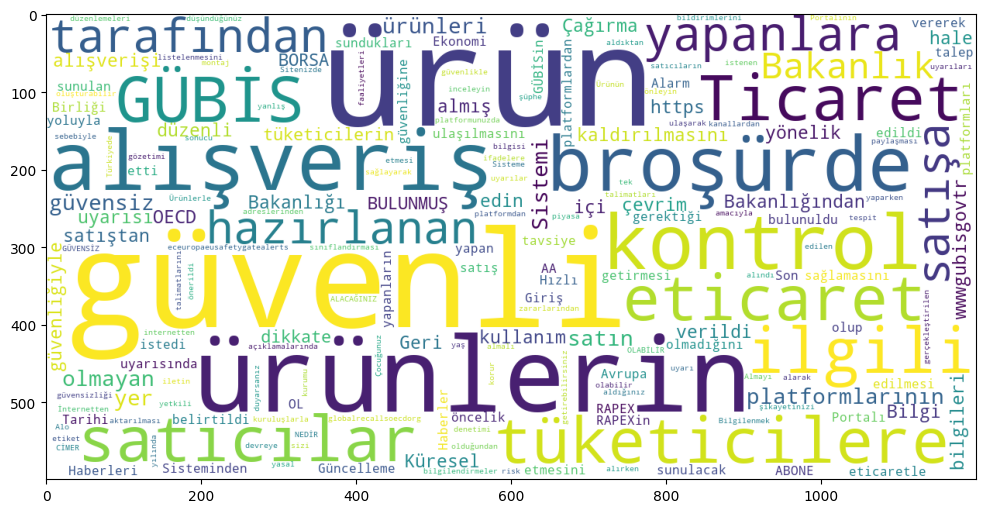

In [114]:
showCloud(cleanText(sabahGazetesi('https://www.sabah.com.tr/ekonomi/ticaret-bakanligindan-e-ticaret-yapanlara-guvenli-urun-uyarisi-6270001')))

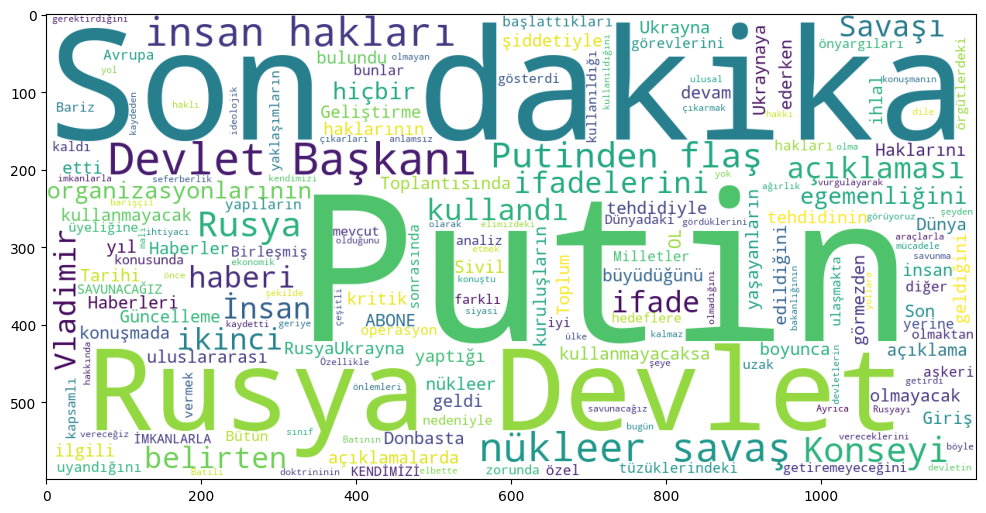

In [115]:
showCloud(cleanText(sabahGazetesi('https://www.sabah.com.tr/dunya/son-dakika-rusya-devlet-baskani-putinden-flas-nukleer-aciklamasi-6269330?paging=8')))

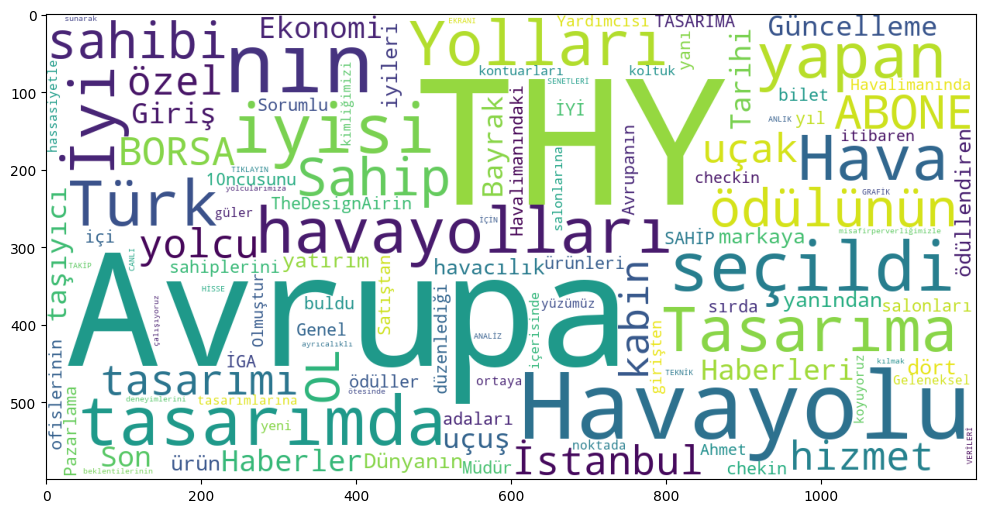

In [9]:
showCloud(cleanText(sabahGazetesi('https://www.sabah.com.tr/ekonomi/thy-tasarimda-da-avrupanin-en-iyisi-secildi-6270073?paging=3')))

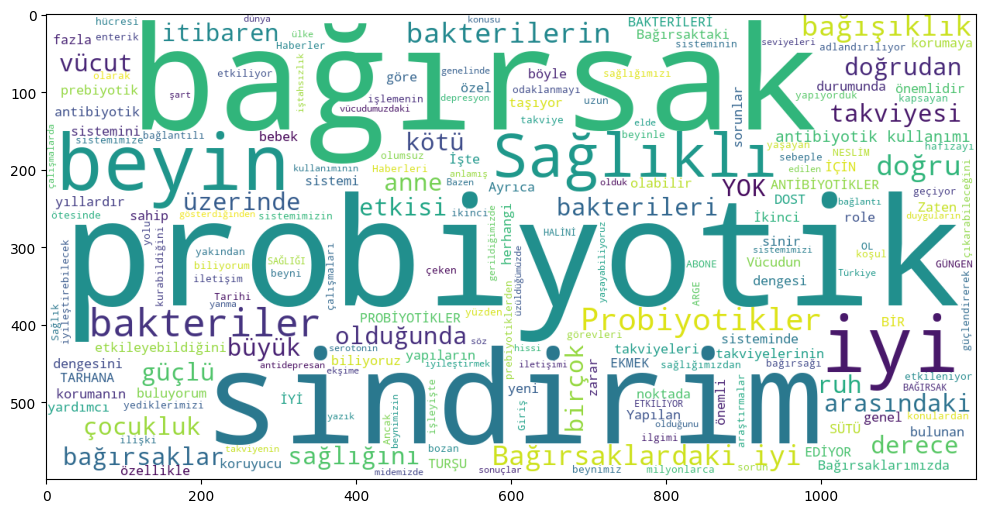

In [10]:
showCloud(cleanText(sabahGazetesi('https://www.sabah.com.tr/saglik/2022/12/08/ikinci-beyin-bagirsaklar')))

## Question 2

1. Using the library [tweepy](https://docs.tweepy.org/en/stable/index.html) pull 5000 tweets (in English) on any topic you'd like.

2. Clean the text and remove all stopwords. Then sketch a word cloud of your collection.

2. Using the library [NLTK](https://www.nltk.org/) apply sentiment analysis on the tweets you collected. 

3. Analyze your results.

I'm waiting for a response from Twitter.

## Question 3

For this question use [UFO Sightings Dataset](https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration/data) from Kaggle.

1. Ingest the dataset as a pandas dataframe, and clean it if necessary.

2. Plot a geographic heatmap of UFO sightings and find hotspots.

3. Is there a statistically verifiable correlation between shape of the UFO and the duration of the sighting. Investigate.

In [3]:
import folium
import mapclassify
from folium.features import GeoJsonTooltip
from descartes import PolygonPatch
from urllib.parse import urlencode


Question 3.1

In [4]:
data = pd.read_csv('scrubbed.csv')
data

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_1874/55279370.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [8]:
data1 = data['latitude']
data1

0        29.8830556
1          29.38421
2              53.2
3        28.9783333
4        21.4180556
            ...    
80327     36.165833
80328     43.613611
80329     38.297222
80330     38.901111
80331     35.652778
Name: latitude, Length: 80332, dtype: object

This value is incorret. I need to change it.

In [9]:
data1[43782]

'33q.200088'

In [10]:
data1.replace("33q.200088", 
           "33.200088", 
           inplace=True)
data1[43782]

'33.200088'

We need to convert 'Latitude' object to float.

In [11]:
data1 = data1.astype(float)
data1[43782]

33.200088

In [12]:
data2 = data['longitude ']
data2

0        -97.941111
1        -98.581082
2         -2.916667
3        -96.645833
4       -157.803611
            ...    
80327    -86.784444
80328   -116.202500
80329   -122.284444
80330    -77.265556
80331    -97.477778
Name: longitude , Length: 80332, dtype: float64

Question 3.2

Sir, I made it with folium because I was constantly getting an error while installing the basemap on my computer.

and I didn't print the code because the folium was visually annoying on github and I added the output to the github repo

In [ ]:
import folium
from folium.plugins import HeatMap

map_obj = folium.Map()
location = []
for i in range(len(data1)) :
    location.append([data1[i],data2[i]])

HeatMap(location).add_to(map_obj)

map_obj

Question 3.3

In [65]:
data3 = data['shape']
df3=data['duration (seconds)']

In [73]:
data3.head(20)

0     cylinder
1        light
2       circle
3       circle
4        light
5       sphere
6       circle
7         disk
8         disk
9         disk
10      circle
11    fireball
12        disk
13     unknown
14        oval
15      circle
16        disk
17        disk
18       light
19       other
Name: shape, dtype: object

In [74]:
df3.head(20)

0     2700
1     7200
2       20
3       20
4      900
5      300
6      180
7     1200
8      180
9      120
10     300
11     180
12    1800
13     180
14      30
15    1200
16     120
17    1800
18      20
19    2700
Name: duration (seconds), dtype: object

In [75]:
Counter(data3).most_common()

[('light', 16565),
 ('triangle', 7865),
 ('circle', 7608),
 ('fireball', 6208),
 ('other', 5649),
 ('unknown', 5584),
 ('sphere', 5387),
 ('disk', 5213),
 ('oval', 3733),
 ('formation', 2457),
 ('cigar', 2057),
 ('changing', 1962),
 (nan, 1932),
 ('flash', 1328),
 ('rectangle', 1297),
 ('cylinder', 1283),
 ('diamond', 1178),
 ('chevron', 952),
 ('egg', 759),
 ('teardrop', 750),
 ('cone', 316),
 ('cross', 233),
 ('delta', 7),
 ('round', 2),
 ('crescent', 2),
 ('pyramid', 1),
 ('flare', 1),
 ('hexagon', 1),
 ('dome', 1),
 ('changed', 1)]

In [76]:
data.iloc[:,4:6]

,shape,duration (seconds)
0,cylinder,2700
1,light,7200
2,circle,20
3,circle,20
4,light,900
...,...,...
80327,light,600.0
80328,circle,1200.0
80329,other,1200.0
80330,circle,5.0


As a result of my investigations, I could not see a correlation between the shape of the UFO and the time it appeared.

## Question 4

For this question use [Turkish Institute of Statistics (TÜİK)](https://data.tuik.gov.tr/) data portal, and [The Humanitarian Data Exchange (HDX)](https://www.eea.europa.eu/data-and-maps/data/) data portal.

1. Get the population data for cities in Turkey as a pandas data frame from TUIK. Notice that TUIK generates the data only for human consumption. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done using python only. You are NOT allowed to clean it externally.

2. Get the crime statistics (Suçun İşlendiği İl ve Suç Türüne Göre Ceza İnfaz Kurumundan Çıkan Hükümlüler) as a pandas data frame from TUIK. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done python only. You are NOT allowed to clean it externally.

3. Get the shape files for the Turkish city municipality borders from HDX, ingest it as a geoPandas datafroma, and then clean it if necessary. Cleaning must be done using python only. You are NOT allowed to clean it externally.

4. Merge the population data, crime data, and the shapefile data into a single geoPandas dataframe.

5. Plot the population data as a choropleth map as I did in the class.

6. Plot the crime data for different categories. However, don't use the raw numbers. Use the normalized data with respect to the population of the city.

In [82]:
import xlrd

In [2]:
df=pd.read_excel('https://data.tuik.gov.tr/Bulten/DownloadIstatistikselTablo?p=/vtxiTKFBPPQlHnyc/wI72tJn4gqwBgmygoKP3Q89zZWU8E6Hyfi03q5kxPWi8zq')

In [3]:
a = df.dropna()
cleanCities = a.iloc[1:89,:]
cleanCities


,"Yıllara göre il nüfusları, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
4,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319.0,...,2125635.0,2149260.0,2165595.0,2183167,2201670.0,2216475.0,2220125.0,2237940.0,2258718.0,2263373.0
5,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067.0,...,595261.0,597184.0,597835.0,602774,610484.0,615076.0,624513.0,626465.0,632459.0,632148.0
6,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365.0,...,703948.0,707123.0,706371.0,709015,714523.0,715693.0,725568.0,729483.0,736912.0,744179.0
7,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180.0,...,552404.0,551177.0,549435.0,547210,542255.0,536285.0,539657.0,536199.0,535435.0,524644.0
8,Amasya,333927,333768.0,333110.0,332271.0,331491.0,330739.0,329956.0,328674,323675.0,...,322283.0,321977.0,321913.0,322167,326351.0,329888.0,337508.0,337800.0,335494.0,335331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Yalova,144923,150027.0,155041.0,160099.0,165333.0,170705.0,176207.0,181758,197412.0,...,211799.0,220122.0,226514.0,233009,241665.0,251203.0,262234.0,270976.0,276050.0,291001.0
81,Karabük,205172,207241.0,209056.0,210812.0,212667.0,214591.0,216557.0,218463,216248.0,...,225145.0,230251.0,231333.0,236978,242347.0,244453.0,248014.0,248458.0,243614.0,249287.0
82,Kilis,109698,111024.0,112219.0,113387.0,114615.0,115886.0,117185.0,118457,120991.0,...,124320.0,128586.0,128781.0,130655,130825.0,136319.0,142541.0,142490.0,142792.0,145826.0
83,Osmaniye,411163,417418.0,423214.0,428943.0,434930.0,441108.0,447428.0,452880,464704.0,...,492135.0,498981.0,506807.0,512873,522175.0,527724.0,534415.0,538759.0,548556.0,553012.0


In [4]:
Table = cleanCities.iloc[:,[0,2]]
Table

,"Yıllara göre il nüfusları, 2000-2021",Unnamed: 2
4,Adana,1899324.0
5,Adıyaman,571180.0
6,Afyonkarahisar,698029.0
7,Ağrı,521514.0
8,Amasya,333768.0
...,...,...
80,Yalova,150027.0
81,Karabük,207241.0
82,Kilis,111024.0
83,Osmaniye,417418.0


In [6]:
Table.rename(columns = {'Yıllara göre il nüfusları, 2000-2021':'Yıllara göre il nüfusları,2021', 'Unnamed: 2':'Nüfus'}, inplace = True)
Table

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_1523/1781870992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table.rename(columns = {'Yıllara göre il nüfusları, 2000-2021':'Yıllara göre il nüfusları,2021', 'Unnamed: 2':'Nüfus'}, inplace = True)


,"Yıllara göre il nüfusları,2021",Nüfus
4,Adana,1899324.0
5,Adıyaman,571180.0
6,Afyonkarahisar,698029.0
7,Ağrı,521514.0
8,Amasya,333768.0
...,...,...
80,Yalova,150027.0
81,Karabük,207241.0
82,Kilis,111024.0
83,Osmaniye,417418.0


In [8]:
s = list(Table['Yıllara göre il nüfusları,2021'])
s

['Adana',
 'Adıyaman',
 'Afyonkarahisar',
 'Ağrı',
 'Amasya',
 'Ankara',
 'Antalya',
 'Artvin',
 'Aydın',
 'Balıkesir',
 'Bilecik',
 'Bingöl',
 'Bitlis',
 'Bolu',
 'Burdur',
 'Bursa',
 'Çanakkale',
 'Çankırı',
 'Çorum',
 'Denizli',
 'Diyarbakır',
 'Edirne',
 'Elazığ',
 'Erzincan',
 'Erzurum',
 'Eskişehir',
 'Gaziantep',
 'Giresun',
 'Gümüşhane',
 'Hakkari',
 'Hatay',
 'Isparta',
 'Mersin',
 'İstanbul',
 'İzmir',
 'Kars',
 'Kastamonu',
 'Kayseri',
 'Kırklareli',
 'Kırşehir',
 'Kocaeli',
 'Konya',
 'Kütahya',
 'Malatya',
 'Manisa',
 'Kahramanmaraş',
 'Mardin',
 'Muğla',
 'Muş',
 'Nevşehir',
 'Niğde',
 'Ordu',
 'Rize',
 'Sakarya',
 'Samsun',
 'Siirt',
 'Sinop',
 'Sivas',
 'Tekirdağ',
 'Tokat',
 'Trabzon',
 'Tunceli',
 'Şanlıurfa',
 'Uşak',
 'Van',
 'Yozgat',
 'Zonguldak',
 'Aksaray',
 'Bayburt',
 'Karaman',
 'Kırıkkale',
 'Batman',
 'Şırnak',
 'Bartın',
 'Ardahan',
 'Iğdır',
 'Yalova',
 'Karabük',
 'Kilis',
 'Osmaniye',
 'Düzce']

In [124]:
dff = pd.read_excel('https://data.tuik.gov.tr/Bulten/DownloadIstatistikselTablo?p=MONYwMFRJEswcMmTlvhzVzMoFOfrB2W1jgAlldWlYxvtRJUN1OTmbaPFJNrHhRDD')

In [127]:
b = dff.dropna()
b

,"İBBS 3. Düzeyde, suçun işlendiği il ve suç türüne göre ceza infaz kurumundan çıkan hükümlüler, 2011-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
15,TR,Türkiye,Toplam - Total,361870,5945,57713,4899,6500,6638,76698,...,758,11896,11917,6640,11908,3327,7074,6438,55840,189
19,TR100,İstanbul,Erkek - Male,56418,934,7121,758,1011,704,12158,...,52,2189,1080,718,1114,431,857,649,8741,42
22,TR211,Tekirdağ,Erkek - Male,4327,76,635,75,88,72,1035,...,2,105,136,384,119,40,74,137,488,1
25,TR212,Edirne,Erkek - Male,3036,39,378,27,47,37,467,...,5,42,63,326,70,17,29,33,892,1
28,TR213,Kırklareli,Erkek - Male,1992,30,291,27,16,22,384,...,11,30,87,178,69,31,23,41,416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,TRC22,Diyarbakır,Erkek - Male,3078,96,310,25,41,13,513,...,-,169,34,34,63,26,24,38,485,-
1327,TRC31,Mardin,Erkek - Male,1013,41,115,12,8,9,151,...,3,42,20,2,44,9,14,20,225,-
1330,TRC32,Batman,Erkek - Male,733,16,74,3,6,6,194,...,-,24,10,2,19,4,6,21,172,-
1333,TRC33,Şırnak,Erkek - Male,552,18,35,5,1,2,41,...,-,36,1,3,7,2,8,1,133,-


In [ ]:
url = "https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/turkey-shapefile/at_download/file"
shape = gpd.read_file(url)
shape

In [ ]:
geo = b.merge(Table,on='Cities')

In [ ]:
citiesTur = [s]
geo.index = geo['Crime']
continental = geo.loc[citiesTur,:]
continental.head()

In [ ]:
ax = continental.boundary.plot(figsize=(20, 6),color='white')
continental.plot(ax=ax, column='Unemployment', cmap='coolwarm', legend=True)
plt.title("Population", fontdict={"fontsize": 15}, pad=5);